In [106]:

import networkx as nx
import numpy as np
import random, math

import time


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import plotly.graph_objects as go
from pyvis.network import Network

#import pygraphviz



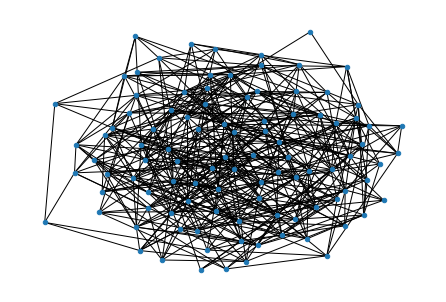

In [107]:

n = 100

G = nx.erdos_renyi_graph(n, 0.1)
initial_nodes = list(G.nodes())

#G.add_node(22)
nx.draw_kamada_kawai(G, with_labels = False, node_size = 20)


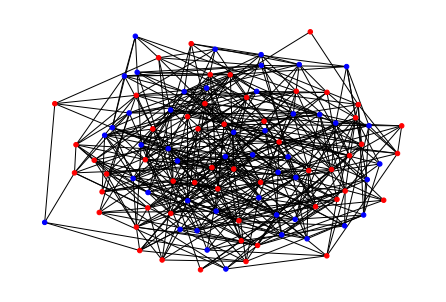

In [108]:

SES_list = np.random.choice(['High', 'Low'], n, p=[0.5,0.5])
nodes = [i for i in range(n)]
SES_dict = {node: {'SES': SES_list[node]} for node in nodes}


nx.set_node_attributes(G, SES_dict)


colormap = ['blue' if SES == 'High' else 'red' for SES in SES_list]
nx.draw_kamada_kawai(G, node_color = colormap, node_size = 20)



In [122]:

def get_select_node_attributes(graph, attribute, node_list):
    attribute_dict_all_nodes = nx.get_node_attributes(graph, attribute)
    attribute_dict = {node: attribute_dict_all_nodes[node] for node in node_list}

    return attribute_dict



def SES_edge_classifier(graph, node1, node2):    
    SES_values = list(get_select_node_attributes(graph, 'SES', [node1, node2]).values())
    link_type = 'within' if SES_values[0] == SES_values[1] else 'cross'

    return link_type


def SES_edge_classifier_all(graph):
    edges = graph.edges()

    list_edge_type = [SES_edge_classifier(graph, edge[0], edge[1]) for edge in edges]

    return list_edge_type


SES_edge_classifier(G, 1, 5)



'within'

In [110]:

print(list(nx.neighbors(G, 19)))
print(get_select_node_attributes(G, 'SES', [19,1,6,26,28]))



[20, 28, 31, 38, 57, 58, 67, 70, 83]
{19: 'High', 1: 'High', 6: 'High', 26: 'High', 28: 'High'}


In [111]:

edge_types = [SES_edge_classifier(G, edge[0], edge[1]) for edge in G.edges]

x = np.asarray(np.unique(edge_types, return_counts=True)).T

xlist = list(map(tuple, x))
xdict = {i[0]: int(i[1]) for i in xlist}

edges_type_dict = {list(G.edges)[i]: edge_types[i] for i in range(len(G.edges))}




In [146]:


targets = [2,3,4,5,6,7,8,9,10]
po = 0.5
px = 0.25

# TRIPLE LIST COMPREHENSION???
# it works but this will make me want to kms in the future (keep it for funsies though)
[np.random.choice([0,1], size=1, p=[1-prob, prob])[0] for prob in [po if edge_type == 'cross' else px for edge_type in [SES_edge_classifier(G, 1, i) for i in targets]]]

edge_types = [SES_edge_classifier(G, 1, i) for i in targets]
edge_probs = [po if edge_type == 'cross' else px for edge_type in edge_types]
edges = [np.random.choice([0,1], size=1, p=[1-prob, prob])[0] for prob in edge_probs]
edges


[0, 1, 0, 0, 1, 0, 0, 0, 0]

### Edge trace

In [113]:

# gets a tuple of arrays of edge positions
def go_get_edge_positions(graph, graph_layout):


    edge_x = []
    edge_y = []

    for edge in graph.edges():
        x0, y0 = graph_layout[edge[0]]
        x1, y1 = graph_layout[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)


    return (edge_x, edge_y)


# gets a edge trace based on a wanted layout and graph
#to add color list later: https://stackoverflow.com/questions/62601052/option-to-add-edge-colouring-in-networkx-trace-using-plotly

def go_get_edge_trace(graph, graph_layout):#, edge_color_list):
    edge_x, edge_y = go_get_edge_positions(graph, graph_layout)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        hoverinfo=None,
        mode='lines',

        line=dict(
            width=0.5, 
            color='#888')
    )

    return edge_trace






### Node trace

In [114]:

# returns a tuple with an array for each of x pos and y pos
def go_get_node_positions(graph, graph_layout):

    node_x_list = []
    node_y_list = []

    for node in graph.nodes():
        node_x, node_y = graph_layout[node]
        node_x_list.append(node_x)
        node_y_list.append(node_y)


    return (node_x_list, node_y_list)




# gets a node trace based on a wanted layout and graph
def go_get_node_trace(graph, graph_layout, node_color_list, node_text):
    node_x, node_y = go_get_node_positions(graph, graph_layout)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        hoverinfo='text',
        mode='markers',
        text=node_text,

        marker=dict(
            size=10,
            color=node_color_list),
    )

    return node_trace




In [115]:

n = 100

GG = nx.erdos_renyi_graph(n, 0.05)


SES_list = np.random.choice(['High', 'Low'], n, p=[0.5,0.5])
SES_color_list = ['blue' if SES == 'High' else 'red' for SES in SES_list]

#SES_edge_types_list = SES_edge_classifier_all(G)
#SES_edge_color_list = ['blue' if edge_type == 'cross' else 'within' for edge_type in SES_edge_types_list]


graph_layout = nx.spring_layout(GG)

edge_trace = go_get_edge_trace(GG, graph_layout)
node_trace = go_get_node_trace(GG, graph_layout, SES_color_list, SES_list)


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

